# <center>Analyse csv files from Stromnetz Graz

In [1]:
import os
import glob
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.gridspec as gridspec

############ Variables ############
# User defined Variables
id_day = '996'      # Endnummer Zaehlpunkt fuer Tagstrom
id_night = '997'    # Endnummer Zaehlpunkt fuer Nachtstrom
id_sum = 'dsum'     # Kenner fuer Tagessummen Messungen
id_res = '15min'    # Kenner fuer 15 Minuten Messungen

# Path Variables
path = os.getcwd() + r'/raw_import'
all_files = glob.glob(path + "/*.csv")

## Import measurements with one day resolution
Tag und Nacht Strom implementiert

In [ ]:
# Concat Variables
day_files = []
night_files = []

# Daysum Day measurements
for filename in all_files:
    if (id_day in filename) and (id_sum in filename):
        day_files.append(filename)
        df_day = pd.concat((pd.read_csv(r,
                                        decimal=',',
                                        header=0,
                                        parse_dates=['date'],
                                        converters={'date': lambda t: dt.datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%f%z').date()},
                                        names=['date', 'zaehlerstand', '1', '2', 'verbrauch', '3', '4'],
                                        usecols=lambda x: x in ['date', 'zaehlerstand', 'verbrauch'],
                                        )
                            for r in day_files))

        df_day['zaehlerstand'] = df_day['zaehlerstand'].astype(float)
        df_day['verbrauch'] = df_day['verbrauch'].astype(float)
        df_day.reset_index(drop=True, inplace=True)
        
# Daysum Night measurements
for filename in all_files:
    if (id_night in filename) and (id_sum in filename):
        night_files.append(filename)
        df_night = pd.concat((pd.read_csv(r,
                                        decimal=',',
                                        header=0,
                                        parse_dates=['date'],
                                        converters={'date': lambda t: dt.datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%f%z').date()},
                                        names=['date', 'zaehlerstand', '1', '2', 'verbrauch', '3', '4'],
                                        usecols=lambda x: x in ['date', 'zaehlerstand', 'verbrauch'],
                                        )
                            for r in night_files))

        df_night['zaehlerstand'] = df_night['zaehlerstand'].astype(float)
        df_night['verbrauch'] = df_night['verbrauch'].astype(float)
        df_night.reset_index(drop=True, inplace=True)
   
############ Clean Dataframes ############
# Night Measurements
df_night.drop(df_night['verbrauch'].idxmax(), inplace=True)

# Day Measurements
df_day.drop(df_day['verbrauch'].idxmax(), inplace=True)

## Import measurements with 15min resolution
Nur Tagstrom implementiert

In [2]:
# Concat Variables
day_files_15min = []

# 15min Resolution Day Measurements
for filename in all_files:
    if (id_day in filename) and (id_res in filename):
        day_files_15min.append(filename)
        df_day_15min = pd.concat((pd.read_csv(r,
                                        decimal=',',
                                        header=0,
                                        #parse_dates=['timestamp'],
                                        #converters={'time': lambda t: dt.datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%f%z')},
                                        names=['timestamp', 'zaehlerstand', '1', '2', 'verbrauch', '3', '4'],
                                        usecols=lambda x: x in ['timestamp', 'zaehlerstand', 'verbrauch'],
                                        )
                            for r in day_files_15min))

        df_day_15min['zaehlerstand'] = df_day_15min['zaehlerstand'].astype(float)
        df_day_15min['verbrauch'] = df_day_15min['verbrauch'].astype(float)
        df_day_15min.reset_index(drop=True, inplace=True)
        df_day_15min['date'] = pd.to_datetime(df_day_15min['timestamp'].str[:10])
        df_day_15min['hour'] = pd.to_datetime(df_day_15min['timestamp'].str[11:16])

## plots

ValueError: Could not interpret value `time` for parameter `x`

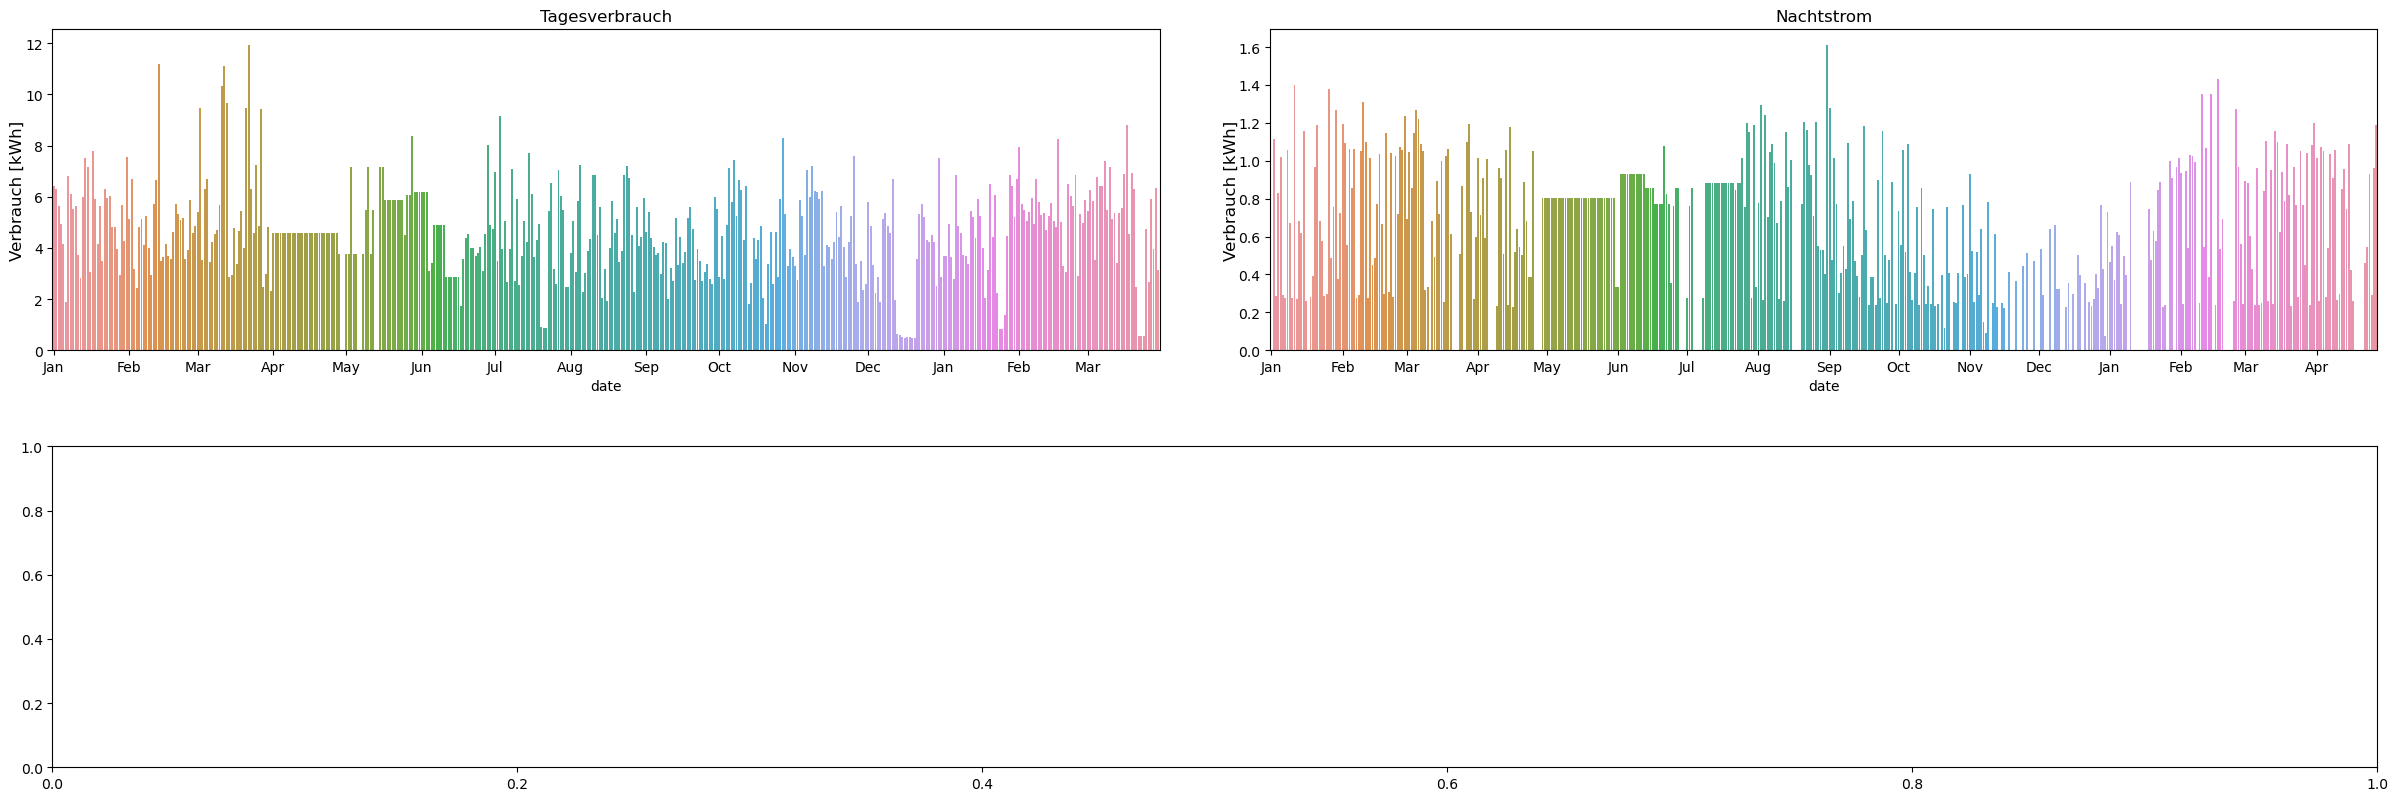

In [5]:
fig = plt.figure(figsize =([30, 15]))

# Gridspec Setup
gs = gridspec.GridSpec(3, 2)
ax = plt.subplot(gs[0, 0])
gs.update(wspace = 0.1, hspace = 0.3)

### AX1 ###
ax1 = plt.subplot(gs[0, :1])
sns.barplot(data=df_day,
            x='date',
            y='verbrauch')
ax1.set_ylabel('Verbrauch [kWh]', labelpad = 0, fontsize = 12)
ax1.xaxis.set_major_locator(md.MonthLocator())
ax1.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax1.set_title('Tagesverbrauch')

### AX2 ###
ax2 = plt.subplot(gs[0, 1:2])
sns.barplot(data=df_night,
            x='date',
            y='verbrauch')
ax2.set_ylabel('Verbrauch [kWh]', labelpad = 0, fontsize = 12)
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax2.set_title('Nachtstrom')

### AX3 ###
ax3 = plt.subplot(gs[1, :])
sns.lineplot(data=df_day_15min,
             x='time',
             y='verbrauch')
# ax3.set_ylabel('ylabel', labelpad = 0, fontsize = 12)

# ax4 = plt.subplot(gs[1, 1:3])
# ax4.set_ylabel('ylabel', labelpad = 0, fontsize = 12)

# ax5 = plt.subplot(gs[1, 3:5])
# ax5.set_ylabel('ylabel', labelpad = 0, fontsize = 12)



# (optional) rotate by 90° the labels in order to improve their spacing
#plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

fig, ax=plt.subplots(ncols=1, nrows=1, figsize=(30,15))

sns.barplot(data=df_night,
             x='date',
             y='verbrauch')

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

plt.show()